In [1]:
import pandas as pd
import os

In [2]:
topic = 'abortion'
scheme = 'EII'

path = os.getcwd()
clean_path = f'{path}/clean'
NN_path = f'{path}/NN/{topic}/{scheme}'

train_file = f'{path}/train/labeled_{topic}_train.csv'
test_file = f'{path}/test/labeled_{topic}_test.csv'

os.makedirs(NN_path, exist_ok=True)
os.makedirs(f'{clean_path}/train', exist_ok=True)
os.makedirs(f'{clean_path}/test', exist_ok=True)

NN_path

'/media/rinnely/Archer/ENES/Stance/Clasificador/NN/abortion/EII'

In [3]:
train = pd.read_csv(train_file)

In [4]:
train.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,Label_EIII,Stance_EIII,Label_EIII_v2,Stance_EIII_v2,Date
0,1344430216194777090,"FINALMENTE! Argentina Legalizes Abortion, a Mi...",1,Favor,0,Uknown,-1,Against,0,Uknown,2020-12-30 17:48:36
1,1344427711742308354,#Abortion will never be approved on our soil! ...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-30 17:38:39
2,1344426576063115267,A HUGE victory for #WomensRights as #Argentina...,0,Uknown,1,Favor,1,Favor,0,Uknown,2020-12-30 17:34:08
3,1344424501006708739,@KLoeffler @KLoeffler CULTURE OF LIFE for all ...,1,Favor,1,Favor,-1,Against,1,Favor,2020-12-30 17:25:53
4,1344424237617061888,Dems are a death cult. They celebrate abortion...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-30 17:24:51


In [5]:
train = train[[f'Label_{scheme}', 'Tweet']]
train.columns = ['Label', 'Tweet']

In [6]:
train.head()

,Label,Tweet
0,0,"FINALMENTE! Argentina Legalizes Abortion, a Mi..."
1,0,#Abortion will never be approved on our soil! ...
2,1,A HUGE victory for #WomensRights as #Argentina...
3,1,@KLoeffler @KLoeffler CULTURE OF LIFE for all ...
4,0,Dems are a death cult. They celebrate abortion...


In [7]:
train.Label.unique()

array([ 0,  1, -1])

In [8]:
train = train.query('Label != 0')
train.Label.unique()

array([ 1, -1])

In [9]:
train.groupby('Label').count()

,Tweet
Label,
-1,2915
1,2311


In [10]:
test = pd.read_csv(test_file)
test.head()

,Tweet,Stance,Target
0,Need a ProLife R.E. Agent? - Support a ProLife...,AGAINST,Legalization of Abortion
1,Where is the childcare program @joanburton whi...,AGAINST,Legalization of Abortion
2,I get several requests with petitions to save ...,AGAINST,Legalization of Abortion
3,"we must always see others as Christ sees us,we...",AGAINST,Legalization of Abortion
4,PRAYERS FOR BABIES Urgent prayer one in Lexing...,AGAINST,Legalization of Abortion


In [11]:
test = test[['Stance', 'Tweet']]
test.Stance.unique()

array(['AGAINST', 'FAVOR'], dtype=object)

In [12]:
test['Stance']= test.Stance.replace({'FAVOR':1, 'AGAINST':-1, 'C':0})
test = test.query('Stance != 0')
test.Stance.unique()

array([-1,  1])

In [13]:
test.columns = ['Label', 'Tweet']
test.groupby('Label').count()

,Tweet
Label,
-1,543
1,167


In [14]:
train.shape, test.shape

((5226, 2), (710, 2))

# clean data

In [15]:
import sys
sys.path.insert(0, '/home/rinnely/ENES/Stance')
import cleandata as cd

In [16]:
train = cd.cleanData(train.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')
test = cd.cleanData(test.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')

In [17]:
train = train.dropna(axis=0)

# save data

In [18]:
train.to_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv', index=False)
test.to_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv', index=False)

# read data

In [19]:
train = pd.read_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv')
test = pd.read_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv')

<AxesSubplot:ylabel='Label'>

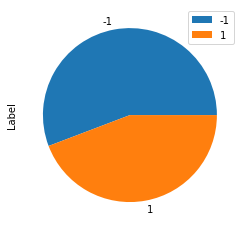

In [20]:
train['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:ylabel='Label'>

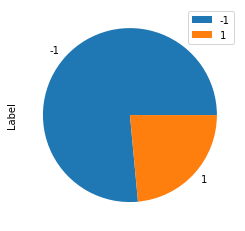

In [21]:
test['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:>

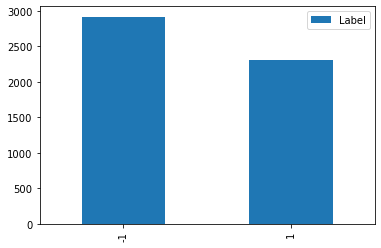

In [22]:
train['Label'].value_counts().plot.bar(legend=True)

<AxesSubplot:>

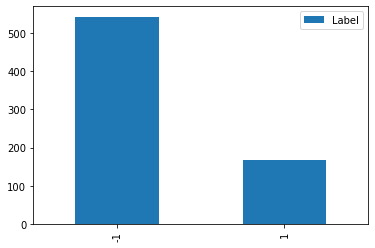

In [23]:
test['Label'].value_counts().plot.bar(legend=True)

In [24]:
train

,Label,Tweet
0,1,A HUGE victory for #WomensRights as #Argentina...
1,1,USER USER CULTURE OF LIFE for all #Georgians #...
2,1,It is not about #abortion... It is about women...
3,1,USER USER covers Preexisting PRO #American #LI...
4,-1,Bill legalising abortion passed in Pope's nati...
...,...,...
5221,-1,What drives women to have #abortions? URL
5222,-1,Common excuse: I will vote #ProLife on the res...
5223,-1,"I completely stand with Polands abortion ban, ..."
5224,-1,Abby Johnson's full remarks at the GOP Convent...


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5226 non-null   int64 
 1   Tweet   5226 non-null   object
dtypes: int64(1), object(1)
memory usage: 81.8+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   710 non-null    int64 
 1   Tweet   710 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.2+ KB


In [27]:
train = train.dropna(axis=0)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5226 entries, 0 to 5225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5226 non-null   int64 
 1   Tweet   5226 non-null   object
dtypes: int64(1), object(1)
memory usage: 122.5+ KB


# Training

In [29]:
from fastai.text import *

In [30]:
data_lm = (TextList.from_df(train, NN_path, cols='Tweet')
          .split_by_rand_pct(0.2)
          .label_for_lm() # this does the tokenization and numericalization
          .databunch())

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [31]:
data_lm.show_batch()

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,"# xxmaj socialists # xxmaj abortion xxmaj defund # xxup blm xxmaj defend xxup url xxbos xxmaj it is not about # abortion ... xxmaj it is about women 's rights and health . xxmaj the fact twitter is full of ' offended ' men says a lot xxmaj want to protest ? xxmaj get a # vasectomy . xxmaj otherwise , applaud xxmaj argentinian women for their grassroots movement"
1,"via xxup user xxbos # xxmaj argentina legalises # abortion in landmark moment for women 's rights : # xxunk : “ xxmaj the struggle for # womensrights is always xxunk , and this time we even had to xxunk with a pandemic , so i am xxunk with this result . ” xxup url xxbos 16 year old children may get # abortion without xxup url xxbos xxmaj argentina"
2,"legislation that xxunk access to # abortion in the state , making the measure law . xxup url xxbos xxup user xxup user xxup user xxup .user is pro - life . xxup user is married to xxmaj xxunk xxmaj xxunk xxmaj brown , a former xxmaj planned xxmaj parenthood xxunk . xxmaj she promotes murdering babies in their womb . xxmaj xxunk does not . xxmaj it ’s all"
3,suffered long enough . xxup url xxbos xxup user xxup culture xxup of xxup life xxup user xxup user # xxup prolife # xxup georgia vs xxup culture xxup of # xxup death # xxmaj abortion # euthanasia # sterilization # xxup lgbtq 5*rate # suicide # xxmaj martiallaw # sharialaw xxup user xxup user r xxup url xxbos xxup user # xxup georgia # xxup ga # xxup gapol
4,own but i xxup do xxup not care if you do . xxmaj my personal beliefs / decisions are for me not for you to abide by . xxmaj religious people who oppose abortion please know that xxmaj god did xxup not send you as a xxunk to apply your religion on others . # prochoice xxmaj argentina xxbos xxmaj argentina has made women 's rights history as the xxmaj


In [32]:
data_clas = TextClasDataBunch.from_df(NN_path, train_df=train, 
                                      valid_df=test, 
                                      vocab=data_lm.vocab, 
                                      text_cols = 'Tweet', 
                                      label_cols = 'Label',
                                      bs=32)

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [33]:
data_clas.show_batch()

text,target
"xxbos xxup can xxup yall xxup stfu xxup worrying xxup about a xxup xxunk xxup body ? ? ? xxup yall xxup get xxup mad xxup when xxup yall xxup taxes xxup go , xxup because xxup the xxup same xxup girl / xxup woman xxup who xxup wanted a xxup abortion xxup is xxup now xxup on xxup food xxup xxunk xxup to xxup supply xxup for xxup the",1
"xxbos xxwrep 6 xxup user 2 . xxmaj xxunk i happen to xxunk & & xxunk abortion ! xxmaj but i am # prolife ! # xxmaj trump is xxup not pro life , no way ! xxmaj it is a $ $ thing for him ! xxup god xxup cares xxup about xxup all xxup life ! xxmaj from the womb to the grave ! ! xxmaj god cares",-1
"xxbos xxup xxunk ( xxmaj just xxmaj one xxmaj white xxmaj guys xxmaj opinion ) : . xxmaj abortion xxup no xxup one is "" pro "" abortion xxmaj abortion xxunk xxmaj it is the xxunk xxunk anyone has to make . xxmaj ever . i 'm not xxmaj god . xxmaj neither are you . xxmaj govt & & xxmaj white xxmaj guys xxmaj like xxmaj me should xxup",1
"xxbos xxup my xxup words : # xxup potus is xxmaj god ’s xxmaj gift of # xxmaj mercy 2 us — # xxmaj xxunk . i say our # xxmaj nation does n’t deserve xxmaj mercy ; bc , all the # xxmaj abortion , sin , xxunk of # xxmaj christ ; yet # xxmaj god has # xxmaj xxunk on us , by giving us xxup user",-1
"xxbos xxup user xxup user xxmaj yeshua xxmaj jesus is # xxmaj prolife xxup and xxup also # xxmaj xxunk . "" xxmaj murderer "" is xxup legal xxunk . xxmaj by definition abortion can not be murder because it is xxup legal in xxmaj america . xxmaj fertility clinics xxunk of embryos . xxmaj girls can do the same . xxmaj obsession with girls ' uteruses is xxup idolatry",-1


In [34]:
f'data_clas_{topic}_{scheme}'

'data_clas_abortion_EII'

In [35]:
data_lm.save(f'data_lm_{topic}_{scheme}')
data_clas.save(f'data_clas_{topic}_{scheme}')

In [36]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

(['xxunk',
  'xxpad',
  'xxbos',
  'xxeos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  '.'],
 3424)

In [37]:
#f'{pathNN}/spanish-model/lm-spanish-weights-2'

In [38]:
#pretrained_model = (f'{pathNN}/spanish-model/lm-spanish-weights-2', f'{pathNN}/spanish-model/spanish-itos-pickle')

In [37]:
#learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, drop_mult=.2)
learn_lm = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-01
Min loss divided by 10: 5.25E-02


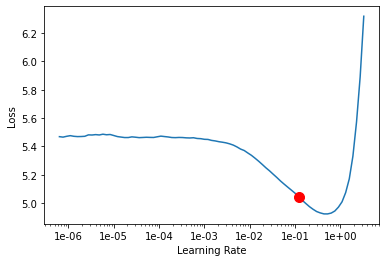

In [38]:
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [39]:
learn_lm.fit_one_cycle(10,5.2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.616497,3.867666,0.267098,00:11
1,4.016046,3.641831,0.290045,00:11
2,3.730691,3.699951,0.291049,00:11
3,3.543394,3.730867,0.289353,00:11
4,3.363534,3.737943,0.293750,00:11
5,3.187051,3.738100,0.297232,00:11
6,3.003994,3.729382,0.301875,00:11
7,2.838476,3.718888,0.304911,00:11
8,2.711550,3.715799,0.305469,00:11
9,2.612231,3.713279,0.306161,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-05
Min loss divided by 10: 4.37E-04


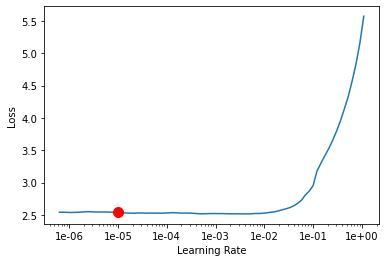

In [40]:
learn_lm.unfreeze()
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [41]:
learn_lm.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.527272,3.708205,0.307790,00:16
1,2.489062,3.695886,0.312388,00:16
2,2.409824,3.721527,0.313504,00:16
3,2.330690,3.744155,0.313438,00:16
4,2.266635,3.745298,0.313237,00:16


In [42]:
learn_lm.save_encoder(f'{topic}_ml_encoder_v1')

In [43]:
learn_lm.load_encoder(f'{topic}_ml_encoder_v1');

In [44]:
learn_lm.save(f'{topic}_model_v1')

In [45]:
learn_lm.load(f'{topic}_model_v1');

In [46]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [47]:
from sklearn.metrics import f1_score

@np_func #converts torch tesnsor as numpy array
def f1_macro(inp, targ): return f1_score(targ, np.argmax(inp, axis=1), average='macro')

In [48]:
learn.load_encoder(f'{topic}_ml_encoder_v1')
learn.metrics=[f1_macro]
learn.freeze()

In [49]:
learn.save('learner-1stage')

In [50]:
learn.load('learner-1stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02
Min loss divided by 10: 1.45E-02


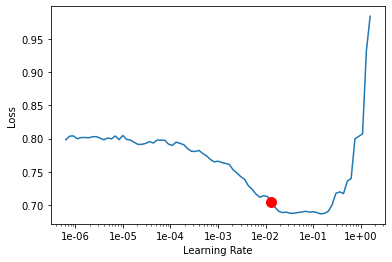

In [51]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [52]:
learn.fit_one_cycle(10,1e-3,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.618649,0.786373,0.545528,00:10
1,0.552015,0.789946,0.542520,00:10
2,0.529363,0.658005,0.613236,00:10
3,0.524686,0.693167,0.585912,00:11
4,0.516936,0.673226,0.607991,00:12
5,0.511512,0.653055,0.621777,00:12
6,0.498637,0.648908,0.618409,00:11
7,0.480682,0.630695,0.630003,00:11
8,0.477477,0.630329,0.623888,00:12
9,0.475127,0.631960,0.620632,00:12


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [53]:
learn.save('learner-2stage')

In [54]:
learn.load('learner-2stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-04
Min loss divided by 10: 1.32E-07


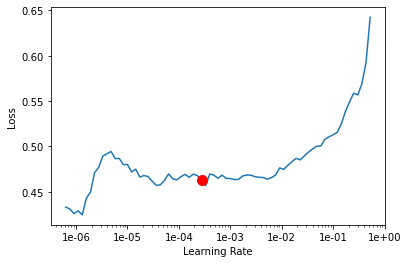

In [55]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [58]:
learn.fit_one_cycle(5, 7.59e-3,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.628151,0.647821,0.590026,00:10
1,0.620084,0.607363,0.612688,00:11
2,0.598756,0.584670,0.633522,00:10
3,0.587910,0.665653,0.586798,00:12
4,0.571241,0.663458,0.590689,00:11


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [59]:
learn.save('learner-3stage')

In [60]:
learn.load('learner-3stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 7.59E-08


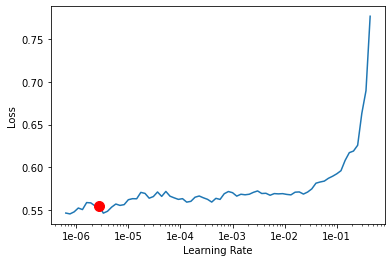

In [61]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [95]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.545096,0.627086,0.617268,00:10
1,0.557446,0.606126,0.624016,00:09
2,0.548171,0.604831,0.625607,00:09
3,0.533450,0.649295,0.608742,00:09
4,0.528238,0.665912,0.597694,00:11


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.37E-05
Min loss divided by 10: 1.58E-07


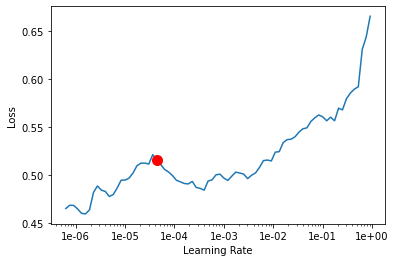

In [56]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [61]:
learn.fit_one_cycle(5,1e-7,moms=(0.8, 0.7));

epoch,train_loss,valid_loss,f1_macro,time
0,0.577153,0.654423,0.621472,00:12
1,0.581025,0.654228,0.629840,00:12
2,0.586434,0.701483,0.586603,00:12
3,0.568914,0.651805,0.629787,00:12
4,0.585588,0.676258,0.610876,00:13


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [63]:
learn.save('learner-stage-freeze-2')

In [64]:
learn.save('learner-stage-freeze-2')

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.09E-04


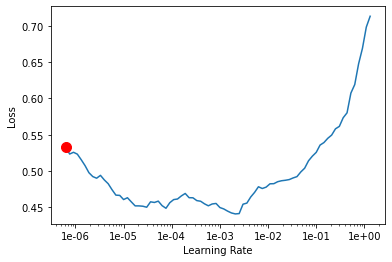

In [56]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [57]:
learn.fit_one_cycle(3, 1e-7, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.476064,0.652403,0.616821,00:20
1,0.481487,0.639559,0.612182,00:21
2,0.459834,0.641081,0.619840,00:20


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [58]:
learn.save('learner-stage-freeze-3')

In [59]:
learn.load('learner-stage-freeze-3');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


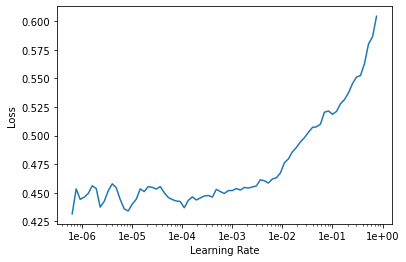

In [60]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [61]:
learn.fit_one_cycle(3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.466050,0.629724,0.626705,00:26
1,0.347564,0.687488,0.640302,00:29
2,0.279128,0.661756,0.672655,00:29


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [62]:
learn.save('learner-stage-unfreeze-67')

In [63]:
learn.load('learner-stage-unfreeze-67');

In [64]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = TextClassificationInterpretation(learn, preds, y, losses)

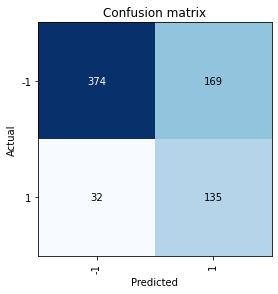

In [65]:
interp.plot_confusion_matrix()

In [66]:
preds

tensor([[0.9968, 0.0032],
        [0.3440, 0.6560],
        [0.9811, 0.0189],
        ...,
        [0.7945, 0.2055],
        [0.1095, 0.8905],
        [0.8214, 0.1786]])

In [67]:
learn.save('learner-final')